In [333]:
# Importar librerias
import requests
import datetime
import pandas as pd

from bs4 import BeautifulSoup # fundamental para scrapping

In [330]:
def get_data_blue(): 
    # Link a la página que contiene la tabla
    # Atención: dolar-plus.com entrega algo más de un año de historico
    url  = 'https://dolar-plus.com/dolar-blue/historico'
    
    # Cargar la página
#    resp = requests.get(url)
    
    # Interpretar la respuesta
    soup = BeautifulSoup(resp.text, "html.parser")
    
    # Crear las columnas del DataFrame
    fecha = [str(row.th.string) for row in soup.body.table.tbody.find_all('tr')]
    compra = [row.find_all('td')[0].string.strip('$ ') for row in soup.body.table.tbody.find_all('tr')]
    venta = [row.find_all('td')[1].string.strip('$ ') for row in soup.body.table.tbody.find_all('tr')]

    # Crear el DataFrame
    data = zip(compra,venta)
    df = pd.DataFrame(data=data,columns=['compra','venta'],index=fecha)
    df.index = df.index.rename('fecha')
    
    # Convertir columnas datetime para fecha y float para compra y venta
    df.index = pd.to_datetime(df.index,dayfirst=True)
    df.compra = df.compra.replace('[\$,]', '.', regex=True).astype(float)
    df.venta = df.venta.replace('[\$,]', '.', regex=True).astype(float)
    df = df.sort_values(by='fecha',ascending=True)
    return(df)

In [331]:
[row.find_all('td') for row in soup.body.table.tbody.find_all('tr')][7]

[<td>$ 115,00</td>, <td>$ 125,00</td>]

            compra  venta
fecha                    
2018-12-11    35.5   37.5
2019-02-15    37.5   38.5
2019-03-01    37.0   39.0
2019-03-02    37.0   39.0
2019-03-03    37.0   39.0
...            ...    ...
2020-06-11   113.0  123.0
2020-06-12   116.0  126.0
2020-06-13   116.0  126.0
2020-06-14   116.0  126.0
2020-06-15   116.0  126.0

[439 rows x 2 columns]


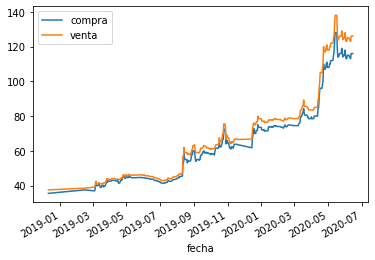

In [334]:
data = get_data_blue()
print(data)
data.plot()

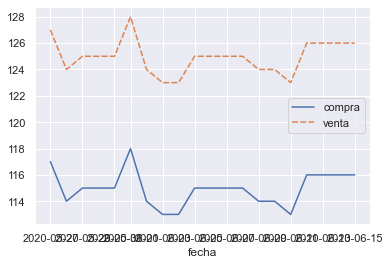

In [363]:
import seaborn as sns
sns.set(style="darkgrid")
sns.lineplot(data=data.tail(20))